<a href="https://colab.research.google.com/github/Durjoy001/Data-Science/blob/main/text_classifier_(random_forest_classifier_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import glob
import pandas as pd
import numpy as np
import os

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
path = "/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/*.xlsx"
all_file = glob.glob(path)

In [42]:
all_file


['/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType10.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType1.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType11.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType9.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType3.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType14.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType18.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType17.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType16.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType2.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType5.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType4.xlsx',
 '/content/drive/MyDrive/Colab Not

In [43]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    
    
    count.append(len(temp))
    names.append(each.split('/')[1][:-5])
    clusters.append(temp['songType'])
    
    
    data.append(temp)
    
cluster_ids =clusters

In [44]:
data = pd.concat(data)
data = data.sample(frac = 1)

data

,Unnamed: 0,lyrics,songType
147,2975,ঘুমিয়ে গেছে শ্রান্ত হয়ে আমার গানের বুলবুলি। ...,7
75,978,"নদীর নাম সই অঞ্জনা নাচে তীরে খঞ্জনা, পাখি সে ন...",7
637,2704,কারে বলে ভালবাসা কারে বলে প্রেম মিলনে বিরহে আম...,1
754,4055,"আমার এ দুটি চোখ পাথর তো নয়, তবু কেন ক্ষয়ে ক্...",3
422,2502,কত কথা ঝরে ছিল এই পথে তবে এত কথা দিয়ে কি হবে ...,13
...,...,...,...
0,0,এবার তোমার কথাগুলোর কাছে আমি অপরাজিত জমে থাকা ...,13
209,1617,"হে নবীনা, প্রতিদিনের পথের ধূলায় যায় না চিনা।। ...",17
443,2591,ঐ চোখ তুলেছে ঝড় এই মনের নির্জনে যেখানে যাও নি...,13
213,1377,জীবন্ মাঝি বৈঠা হাতে যায় সে কূলের পানে আসবে র...,13


In [45]:
stop_words = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]

In [46]:
data['lyrics'] = data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [47]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.ensemble import  RandomForestClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',RandomForestClassifier()),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

Cross Accuracy: 0.47 (+/- 0.02)


In [50]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.47 (+/- 0.02)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.36      0.80      0.50       351
           2       0.00      0.00      0.00         4
           3       0.48      0.25      0.33       245
           4       1.00      0.25      0.40         4
           5       0.00      0.00      0.00        16
           6       0.50      0.04      0.07        28
           7       1.00      0.06      0.11        67
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        21
          11       0.33      0.05      0.09        20
          12       0.00      0.00      0.00        40
          13       0.55      0.24      0.33       229
          14       1.00      0.11      0.20        18
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

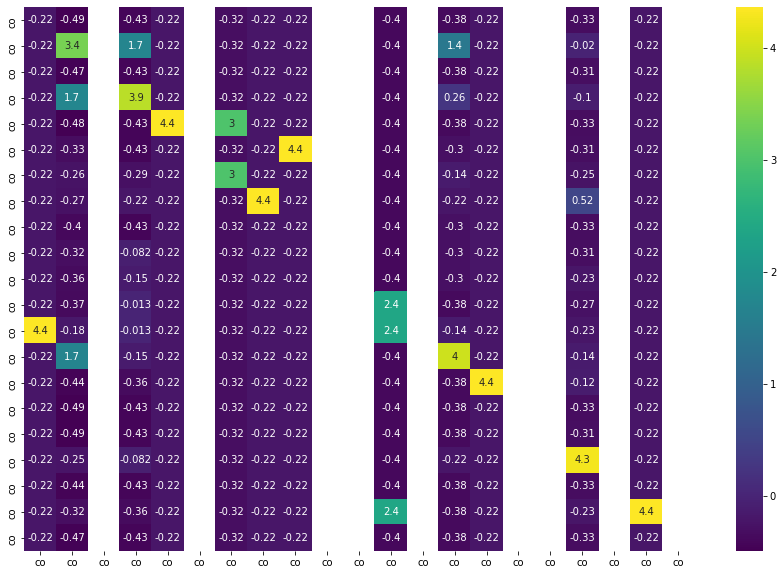

In [52]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array, index = [i for i in names],
              columns = [i for i in names])
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (15,10))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')